# Execute Machine Learning by using iris dataset

### keyword : #iris, #train_test_split, #Cross Validation, #kNN, #SVM, #MLP

In [1]:
from sklearn.datasets import load_iris

In [2]:
# If as_frame=True, the data is a pandas DataFrame including columns with appropriate dtypes (numeric).
# and The target is a pandas DataFrame or Series depending on the number of target columns. 
data = load_iris(as_frame=True)

In [6]:
# Generate Pandas Dataframe of iris dataset
iris = data.frame

iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Prepare ML
* Split iris dataset to train set and validation set for prevent overfitting

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# train_test_split()'s parameter descript
# -> Data, Target, test_size=test set ratio, shuffle=True, stratify= keepping class ratio
# -> https://teddylee777.github.io/scikit-learn/train-test-split

X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,:-1], iris.target, stratify=iris.target)

In [10]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

112 112
38 38


## Cross Validation of Splited Data
* Cross Validation : Training set과 Validation 을 여러번 나눈 뒤 모델의 학습을 검증하는 방식

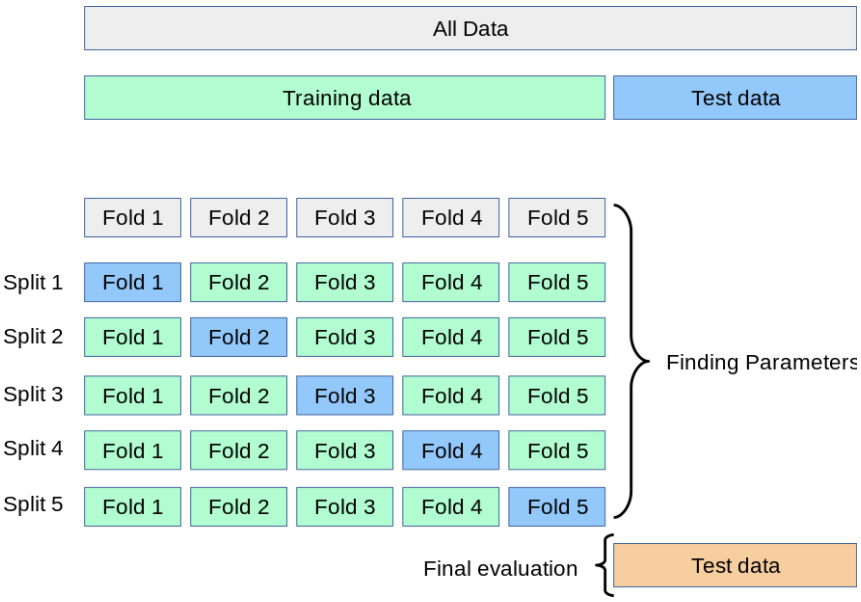

1. 데이터를 K 등분 (위 이미지의 경우 K=5)

2. 1/5 를 검증데이터로, 나머지 4/5 를 학습 데이터로 사용

3. 순차적으로 1/5 검증데이터를 바꾸며 성능 평가 

* 총 5개의 성능 결과 도출
* 이 5개 결과에 대한 평균을 해당 학습 모델의 성능이라 함 <중요>

    - 참고 링크 : https://huidea.tistory.com/30

In [11]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=6c19ce7cca8c94e6993b4ac1b63b42ce6d048e274986318fecef6242c3736d26
  Stored in directory: c:\users\tae\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [12]:
# Cross Validation Plotting API
import mglearn

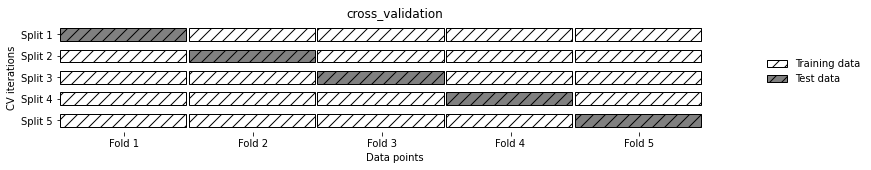

In [13]:
# Cross Validation Plotting
mglearn.plot_cross_validation.plot_cross_validation()

In [14]:
# Scikit-Learn의 Cross Validation API
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate, cross_val_predict

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network  import MLPClassifier

---

### kNN

In [16]:
# Cross validation of KNeighborsClassifier 
# parameter "cv" is the number of fold ( If cv=5, then Execute 5-fold cross validation )

knn = cross_val_score(KNeighborsClassifier(), iris.iloc[:,:-1], iris.target, cv=10, n_jobs=-1)

In [51]:
print("* kNN Performance :",knn.mean())

pd.DataFrame(knn)

* kNN Performance : 0.9666666666666668


,0
0,1.000000
1,0.933333
2,1.000000
3,1.000000
4,0.866667
5,0.933333
6,0.933333
7,1.000000
8,1.000000
9,1.000000


### To convert Dataframe of each performance, Conduct cross validation <u>by using two parameter</u> for useful data analysis
<중요>

In [50]:
# parameter를 통해 세부적으로 확인하기
knn2 = cross_validate(KNeighborsClassifier(), iris.iloc[:,:-1], iris.target, cv=10, n_jobs=-1, 
                     return_train_score =True, return_estimator =True)

print(type(knn2), "\n\n")
pd.DataFrame(knn2)

# => 그냥 수행한 것과 dataFrame이 다른 것을 알아두자

<class 'dict'> 




,fit_time,score_time,estimator,test_score,train_score
0,0.009494,0.008071,KNeighborsClassifier(),1.000000,0.962963
1,0.009390,0.007158,KNeighborsClassifier(),0.933333,0.970370
2,0.004999,0.006583,KNeighborsClassifier(),1.000000,0.962963
3,0.005942,0.009567,KNeighborsClassifier(),1.000000,0.970370
4,0.010075,0.008832,KNeighborsClassifier(),0.866667,0.985185
5,0.006998,0.006094,KNeighborsClassifier(),0.933333,0.962963
6,0.008548,0.009957,KNeighborsClassifier(),0.933333,0.977778
7,0.010046,0.007612,KNeighborsClassifier(),1.000000,0.962963
8,0.008092,0.008077,KNeighborsClassifier(),1.000000,0.962963
9,0.009368,0.009053,KNeighborsClassifier(),1.000000,0.970370


---

### SVM

In [30]:
svm = cross_val_score(SVC(), iris.iloc[:,:-1], iris.target, cv=10, n_jobs=-1)

In [52]:
print("* svm Performance :",svm.mean())

pd.DataFrame(svm)

* svm Performance : 0.9733333333333334


,0
0,1.000000
1,0.933333
2,1.000000
3,1.000000
4,1.000000
5,0.933333
6,0.933333
7,0.933333
8,1.000000
9,1.000000


In [ ]:
# parameter를 통해 세부적으로 확인하기
svm2 = cross_validate(SVC(), iris.iloc[:,:-1], iris.target, cv=10, n_jobs=-1, 
                     return_train_score =True, return_estimator =True)

pd.DataFrame(svm2)

---

### MLP

In [32]:
mlp = cross_val_score(MLPClassifier(), iris.iloc[:,:-1], iris.target, cv=10, n_jobs=-1)

In [53]:
print("* mlp Performance :",mlp.mean())

pd.DataFrame(mlp)

* mlp Performance : 0.9800000000000001


,0
0,1.000000
1,1.000000
2,1.000000
3,1.000000
4,0.866667
5,1.000000
6,0.933333
7,1.000000
8,1.000000
9,1.000000


In [ ]:
# parameter를 통해 세부적으로 확인하기
mlp2 = cross_validate(MLPClassifier(), iris.iloc[:,:-1], iris.target, cv=10, n_jobs=-1, 
                     return_train_score =True, return_estimator =True)

pd.DataFrame(mlp2)

---

In [34]:
import seaborn as sns

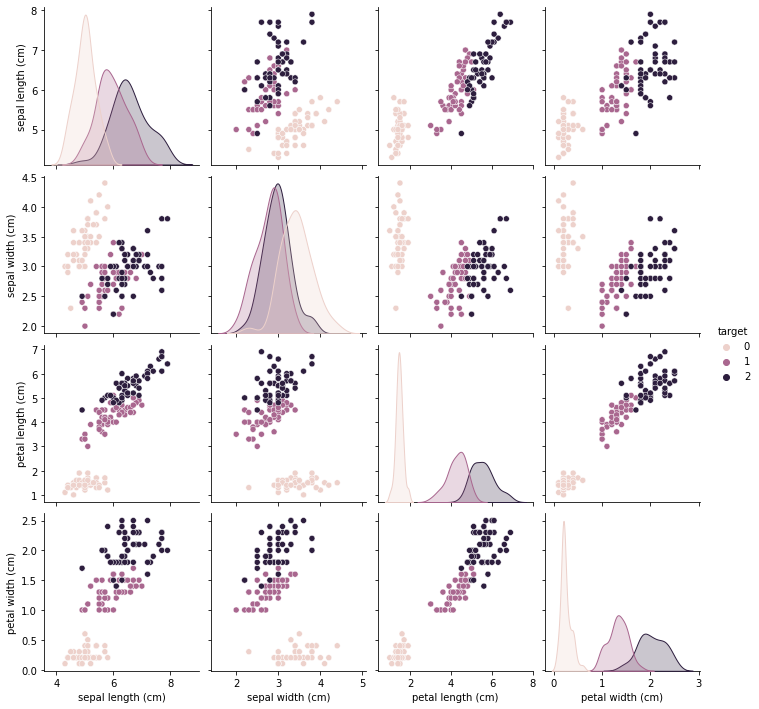

In [35]:
sns.pairplot(iris, hue='target')

### Dummy Classifier
    - 많은 것을 선택하는 더미 분류기
    - parameter strategy="most_frequent"

In [36]:
from sklearn.dummy import DummyClassifier

In [37]:
dum = cross_val_score(DummyClassifier(strategy="most_frequent"), iris.iloc[:,:-1], iris.target, cv=10, n_jobs=-1)

In [38]:
print(dum, "\n")

print("* dummy Performance :",dum.mean())

[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333] 

* dummy Performance : 0.33333333333333337


## Plotting fit_time and score_time of each ML

In [43]:
import pandas as pd

In [48]:
print(type(knn2))
pd.DataFrame(knn2)

<class 'dict'>


,fit_time,score_time,estimator,test_score,train_score
0,0.008970,0.009125,KNeighborsClassifier(),1.000000,0.962963
1,0.008157,0.008969,KNeighborsClassifier(),0.933333,0.970370
2,0.009452,0.009144,KNeighborsClassifier(),1.000000,0.962963
3,0.008969,0.010646,KNeighborsClassifier(),1.000000,0.970370
4,0.007972,0.008126,KNeighborsClassifier(),0.866667,0.985185
5,0.009128,0.008638,KNeighborsClassifier(),0.933333,0.962963
6,0.010133,0.009483,KNeighborsClassifier(),0.933333,0.977778
7,0.008970,0.008157,KNeighborsClassifier(),1.000000,0.962963
8,0.007656,0.009142,KNeighborsClassifier(),1.000000,0.962963
9,0.008157,0.007973,KNeighborsClassifier(),1.000000,0.970370


<AxesSubplot:>

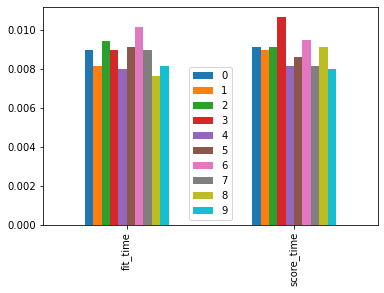

In [45]:
# ['fit_time':'score_time'] 에 대하여 plotting

# from_dict() : knn2 to Dataframe (ps. knn is consist of dictionary type)
# .T : Transpose index and columns method
pd.DataFrame.from_dict(knn2).T.loc['fit_time':'score_time'].plot.bar()